In [1]:
from activation_functions import *
from loss_functions import *
from utils import *
from MLP import *
from train import *
from generate_data import *

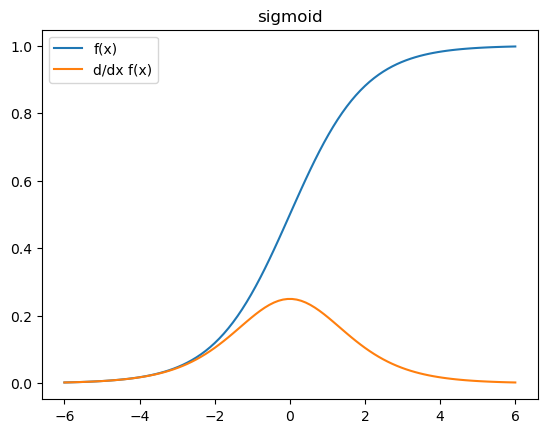

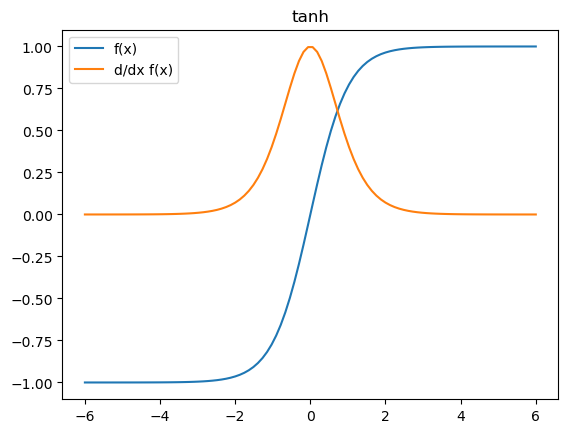

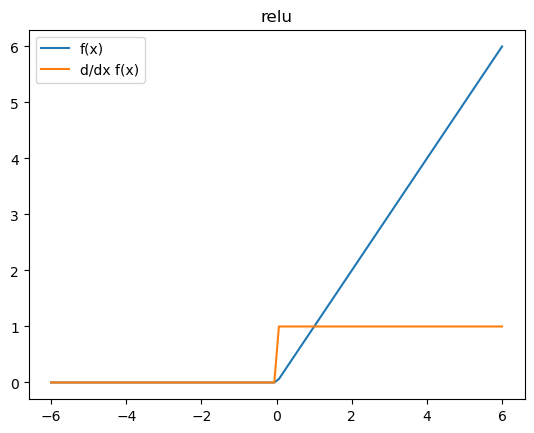

In [2]:
x = np.linspace(-6, 6, 100)
for fn, name in zip([Sigmoid(), TanH(), ReLU()], ["sigmoid", "tanh", "relu"]):
    plot_fn(x, fn, name)

In [3]:
# Get our data
X_train, X_test,y_train, y_test = generate_data()
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))
# Initialize and train the model
input_size, output_size = train_data[0][0].shape[0], 1
hidden_size = 8
activation_func = Sigmoid(); loss_func = MSE(); epochs = 200; lr = 1e-3
model = MLP(input_size, hidden_size, output_size, activation_func)
gradient_optimiser = GradientDescent()
train_loss_arr, valid_loss_arr = gradient_optimiser.gradient_descent(train_data, test_data, model, loss_func=loss_func, epochs=epochs, learning_rate=lr)

Initial Validation: 3.38354579853966
Epoch 0: 2.1875434655966446 Train Loss, 1.562812667360462 Valid Loss
Epoch 1: 1.4026110278962158 Train Loss, 1.0881330861890803 Valid Loss
Epoch 2: 1.0842177160771846 Train Loss, 0.8717856528863136 Valid Loss
Epoch 3: 0.9276416560688365 Train Loss, 0.7585970649002464 Valid Loss
Epoch 4: 0.8367411212730745 Train Loss, 0.6893406051098822 Valid Loss
Epoch 5: 0.7733835332955225 Train Loss, 0.6394779433208199 Valid Loss
Epoch 6: 0.7216328685178707 Train Loss, 0.5985347193425297 Valid Loss
Epoch 7: 0.674843019974912 Train Loss, 0.5621067063898555 Valid Loss
Epoch 8: 0.6304659467468962 Train Loss, 0.528466100004404 Valid Loss
Epoch 9: 0.5877726031047044 Train Loss, 0.4970229384519543 Valid Loss
Epoch 10: 0.546795771789363 Train Loss, 0.46761962993810113 Valid Loss
Epoch 11: 0.5078346951366648 Train Loss, 0.4402242637247211 Valid Loss
Epoch 12: 0.4712214827133582 Train Loss, 0.4148111001310268 Valid Loss
Epoch 13: 0.4372140994584502 Train Loss, 0.3913251595

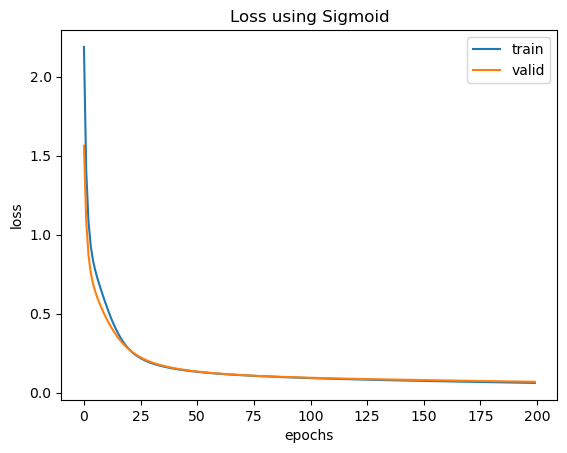

In [4]:
plot_loss(train_loss_arr, valid_loss_arr, "Sigmoid")

In [5]:
# Get some data for a good visualization
X_train, X_test,y_train, y_test = generate_data_for_visualisation()
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

In [6]:
input_size, output_size = train_data[0][0].shape[0], 1
hidden_size = 8
activation_func = Sigmoid(); loss_func = MSE(); epochs = 200; lr = 1e-3
model = MLP(input_size, hidden_size, output_size, activation_func)
train_loss_arr, valid_loss_arr = gradient_optimiser.gradient_descent(train_data, test_data, model, loss_func=loss_func, epochs=epochs, learning_rate=lr)

Initial Validation: 1.2378269954087504
Epoch 0: 0.9160701718209973 Train Loss, 0.9024557620519204 Valid Loss
Epoch 1: 0.8772405175361174 Train Loss, 0.8893870647420608 Valid Loss
Epoch 2: 0.8669597786877552 Train Loss, 0.8796339531908179 Valid Loss
Epoch 3: 0.8587584002248608 Train Loss, 0.8713070597304869 Valid Loss
Epoch 4: 0.8513240126233219 Train Loss, 0.8635514208510254 Valid Loss
Epoch 5: 0.8441475338324946 Train Loss, 0.8560186845685445 Valid Loss
Epoch 6: 0.8370356296049295 Train Loss, 0.8485559466205379 Valid Loss
Epoch 7: 0.8299089268060801 Train Loss, 0.8410861799064917 Valid Loss
Epoch 8: 0.8227279265901447 Train Loss, 0.8335626575542302 Valid Loss
Epoch 9: 0.8154667023005883 Train Loss, 0.8259516411812831 Valid Loss
Epoch 10: 0.8081041177118644 Train Loss, 0.8182258873631081 Valid Loss
Epoch 11: 0.8006213118797086 Train Loss, 0.8103623218922688 Valid Loss
Epoch 12: 0.7930013256639024 Train Loss, 0.8023413246159712 Valid Loss
Epoch 13: 0.785229379534031 Train Loss, 0.794146

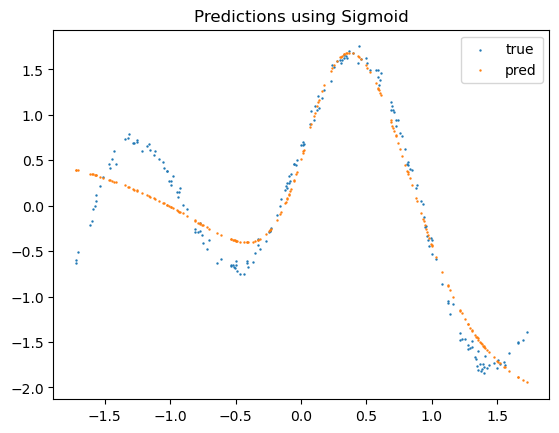

In [7]:
valid_losses = gradient_optimiser.evaluate(test_data, model, MSE())

y_preds = []
for (x, y) in test_data:
    y_preds.append(model.forward(x))

plot_predictions(X_test, y_test, y_preds, "Sigmoid")

In [8]:
input_size, output_size = train_data[0][0].shape[0], 1
hidden_size = 8
activation_func = TanH(); loss_func = MSE(); epochs = 200; lr = 1e-3
model = MLP(input_size, hidden_size, output_size, activation_func)
train_loss_arr, valid_loss_arr = gradient_optimiser.gradient_descent(train_data, test_data, model, loss_func=loss_func, epochs=epochs, learning_rate=lr)

Initial Validation: 2.27400802387155
Epoch 0: 1.0574944351533089 Train Loss, 0.904602785563034 Valid Loss
Epoch 1: 0.8388870607989115 Train Loss, 0.8097408130023149 Valid Loss
Epoch 2: 0.75734218329515 Train Loss, 0.7326219921207427 Valid Loss
Epoch 3: 0.6875502677130103 Train Loss, 0.6623767350624479 Valid Loss
Epoch 4: 0.6209556015674679 Train Loss, 0.5925252431207052 Valid Loss
Epoch 5: 0.5545370608912591 Train Loss, 0.5231479380046636 Valid Loss
Epoch 6: 0.49045981222143115 Train Loss, 0.45782863427320875 Valid Loss
Epoch 7: 0.43212461947953423 Train Loss, 0.39965150857275816 Valid Loss
Epoch 8: 0.3813425368687945 Train Loss, 0.3495767179606329 Valid Loss
Epoch 9: 0.3380475989844566 Train Loss, 0.3070309026698269 Valid Loss
Epoch 10: 0.3012713377524386 Train Loss, 0.27094268088069406 Valid Loss
Epoch 11: 0.2699429832056018 Train Loss, 0.24029911196981643 Valid Loss
Epoch 12: 0.243178963873315 Train Loss, 0.21427469335258398 Valid Loss
Epoch 13: 0.2202910194154218 Train Loss, 0.1921

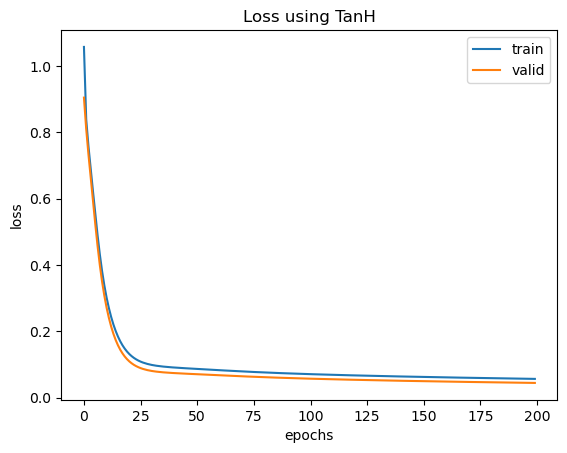

In [9]:
plot_loss(train_loss_arr, valid_loss_arr, "TanH")

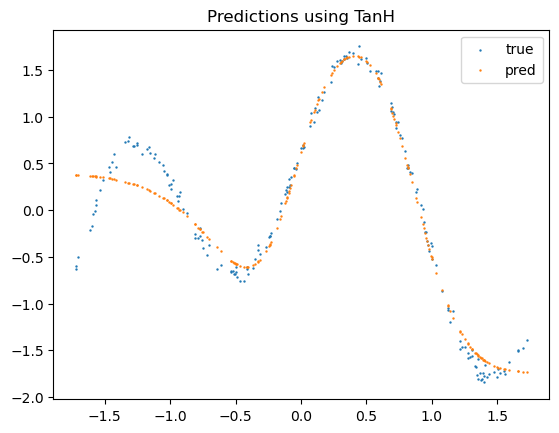

In [10]:
valid_losses = gradient_optimiser.evaluate(test_data, model, MSE())

y_preds = []
for (x, y) in test_data:
    y_preds.append(model.forward(x))

plot_predictions(X_test, y_test, y_preds, "TanH")

In [11]:
input_size, output_size = train_data[0][0].shape[0], 1
hidden_size = 8
activation_func = ReLU(); loss_func = MSE(); epochs = 200; lr = 1e-3

model = MLP(input_size, hidden_size, output_size, activation_func)
train_loss_arr, valid_loss_arr = gradient_optimiser.gradient_descent(train_data, test_data, model, loss_func=loss_func, epochs=epochs, learning_rate=lr)

Initial Validation: 5.229807381897156
Epoch 0: 1.3941094706529944 Train Loss, 0.9632240946840348 Valid Loss
Epoch 1: 0.736618976341904 Train Loss, 0.5979274882679576 Valid Loss
Epoch 2: 0.5036003676653626 Train Loss, 0.44224029499407164 Valid Loss
Epoch 3: 0.40609288263520577 Train Loss, 0.3702954048394062 Valid Loss
Epoch 4: 0.35924181689397955 Train Loss, 0.33063530166694216 Valid Loss
Epoch 5: 0.33124626439032423 Train Loss, 0.3039677089518152 Valid Loss
Epoch 6: 0.31061284446315734 Train Loss, 0.28299567005789183 Valid Loss
Epoch 7: 0.29333577706774405 Train Loss, 0.2653013515728999 Valid Loss
Epoch 8: 0.27822197006108335 Train Loss, 0.24966657943324974 Valid Loss
Epoch 9: 0.26465163648749174 Train Loss, 0.23573671060382775 Valid Loss
Epoch 10: 0.25223625631030927 Train Loss, 0.2234425443374796 Valid Loss
Epoch 11: 0.2408518956936952 Train Loss, 0.21245152629138858 Valid Loss
Epoch 12: 0.23050765558756595 Train Loss, 0.2025615826792444 Valid Loss
Epoch 13: 0.22113714946301236 Train

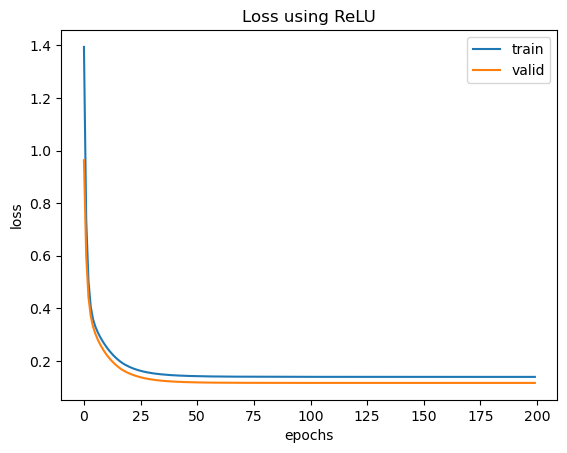

In [12]:
plot_loss(train_loss_arr, valid_loss_arr, "ReLU")

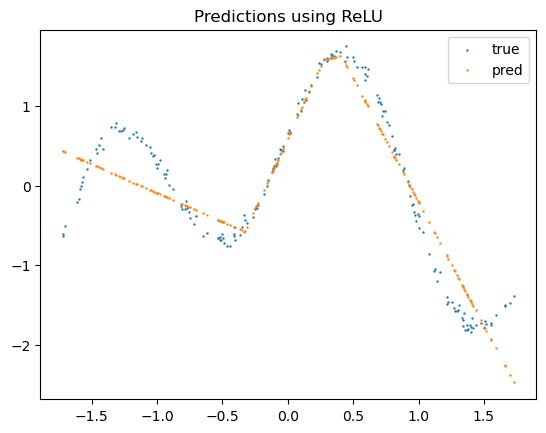

In [13]:
# Plotting predictions onto the custom function
valid_losses = gradient_optimiser.evaluate(test_data, model, MSE())

y_preds = []
for (x, y) in test_data:
    y_preds.append(model.forward(x))

plot_predictions(X_test, y_test, y_preds, "ReLU")